![](https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png)

In this notebook, we would train ANNs and CNNs on the MNIST Digit Classification Dataset. The data files `train.csv` and `test.csv` contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive. The training data set, `(train.csv)`, has 785 columns. The first column, called `"label"`, is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

## ANN (Artificial Neural Network)
Let's look at what ANNs are.

An **Artificial Neural Network (ANN)** in the field of Artificial intelligence where it attempts to mimic the network of neurons makes up a human brain so that computers will have an option to understand things and make decisions in a human-like manner. The artificial neural network is designed by programming computers to behave simply like interconnected brain cells.

**The architecture of an artificial neural network:**

To understand the concept of the architecture of an artificial neural network, we have to understand what a neural network consists of. In order to define a neural network that consists of a large number of artificial neurons, which are termed units arranged in a sequence of layers. Lets us look at various types of layers available in an artificial neural network.

Artificial Neural Network primarily consists of three layers:

![](https://static.javatpoint.com/tutorial/artificial-neural-network/images/artificial-neural-network4.png)

1. Input Layer: As the name suggests, it accepts inputs in several different formats provided by the programmer.

2. Hidden Layer: The hidden layer presents in-between input and output layers. It performs all the calculations to find hidden features and patterns.

3. Output Layer: The input goes through a series of transformations using the hidden layer, which finally results in output that is conveyed using this layer.

The artificial neural network takes input and computes the weighted sum of the inputs and includes a bias. This computation is represented in the form of a transfer function.

![](https://static.javatpoint.com/tutorial/artificial-neural-network/images/artificial-neural-network5.png)

Artificial Neural Network determines weighted total is passed as an input to an activation function to produce the output. Activation functions choose whether a node should fire or not. Only those who are fired make it to the output layer. There are distinctive activation functions available that can be applied upon the sort of task we are performing. For regression, we can use `softmax` however for classification, we can use `sigmoid`.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print('X train shape', X_train.shape)
print('X test shape', X_test.shape)

X train shape (60000, 28, 28)
X test shape (10000, 28, 28)


`y_train` and `y_test` basically contain the classes that are to be predicted with the help of the images provided

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's take a look at an image from the training dataset

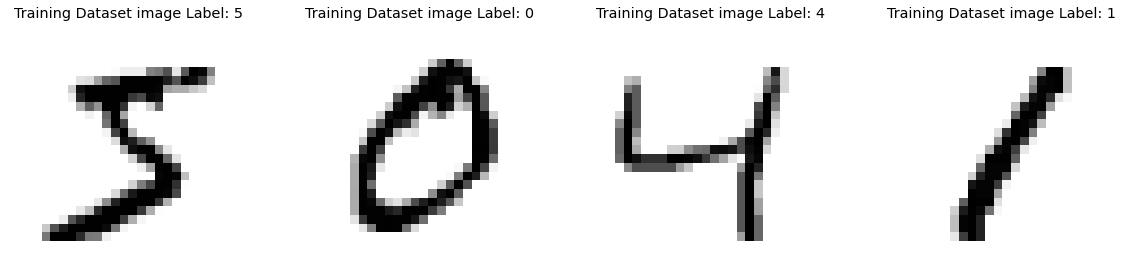

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,15))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training Dataset image Label: {label}")    

In [7]:
fig= px.histogram(x=y_train, template='simple_white', text_auto= True,
                  labels = {'color': 'Label', 'x':'Label'},
                  color = y_train, title='Image Labels Countplot')

fig.update_layout(xaxis_title="Image Labels",yaxis_title=" Count")

fig.update_xaxes(ticktext=np.unique(y_train),tickvals=np.unique(y_train), ticklabelstep=1)

fig.show()

## Preprocessing

One of the ways to account for the imbalance in our data is to use the `class_weight` parameter which will help the model give a little more weight to the classes that have lesser occurence in the data.

In [8]:
class_weight = {}
for i in range(len(np.unique(y_train))):
    for x in [np.around((len(y_train[y_train==i]))/(y_train.shape[0]),4)]:
        class_weight[i] = x
        
print('=== CLASS WEIGHT ===')
print(class_weight)

=== CLASS WEIGHT ===
{0: 0.0987, 1: 0.1124, 2: 0.0993, 3: 0.1022, 4: 0.0974, 5: 0.0904, 6: 0.0986, 7: 0.1044, 8: 0.0975, 9: 0.0992}


 We are dividing the variables by 255 in order to scale them down within a certain range which will help the model converge faster and hence reduce the training time.

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train[0][0:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Building an ANN

We are using the **ELU** activation function here.

ELU, also know as **Exponential Linear Unit** is an activation function which is somewhat similar to the ReLU with some differences. Similar to other non-saturating activation functions, ELU does not suffer from the problem of vanishing gradients and exploding gradients. And similar to Leaky-ReLU and PReLU, and unlike ReLU, ELU does not suffer from the problems of dying neurons. It has proven to be better than ReLU and its variants like Leaky-ReLU(LReLU) and Parameterized-ReLU(PReLU). Using ELU leads to a lower training times but higher accuracies in Neural Networks as compared to ReLU, and its variants.

ELU activation function is continuous and differentiable at all points. Mathematically, the ELU activation function can be written as-

y = ELU(x) = exp(x) − 1 ; if x<0

y = ELU(x) = x ; if x≥0

**Pros**
* It is continuous and differentiable at all points.
* It is leads to faster training times as compared to other linear non-saturating activation functions such as ReLU and its variants.
* Unlike ReLU, it does not suffer from the problem of dying neurons. This is because of the fact that the gradient of ELU is non-zero for all negative values.
* Being a non-saturating activation function, it does not suffer from the problems of exploding or vanishing gradients.
* It achieves higher accuracy as compared to other activation functions such as ReLU and variants, Sigmoid, and Hyperbolic Tangent.

**Cons**
* It is slower to compute in comparison to ReLU and its variants because of the non-linearity involved for the negative inputs. However, during the training times, this is more than compensated by the faster convergence of ELU. But during the test time, ELU will perform slower than ReLU and its variants.

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #Flattening the data

model.add(Dense(128,activation='elu')) #input layer
model.add(BatchNormalization())

model.add(Dense(64,activation='elu'))  #Hidden Layer
model.add(BatchNormalization())

model.add(Dense(32,activation='elu'))  #Hidden Layer
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(16,activation='elu'))  #Hidden Layer
model.add(BatchNormalization())

model.add(Dense(10,activation='softmax'))  #Output Layer
model.summary()

2022-09-14 15:11:12.108662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 15:11:12.112574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 15:11:12.113255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                1

2022-09-14 15:11:12.115193: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-14 15:11:12.115518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 15:11:12.116471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 15:11:12.117340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

Keras is setting the initial weights and biases which we can see below. These will later on be updated using `Backpropogation` and `Gradient Descent` and will keep on updating until convergence happens which means the loss is minimum but at the same time its also critical to understand if the data will overfit or not. Below is how the weights and biases are updated and this is what in Deep Learning is termed as `Backpropogation` 

![](https://miro.medium.com/max/1838/1*diQ7YbcLAZvqTMSOU8TYNw.png)

**Weight initialization** is an important design choice when developing deep learning neural network models. Historically, weight initialization involved using small random numbers, although over the last decade, more specific heuristics have been developed that use information, such as the type of activation function that is being used and the number of inputs to the node.

**Why Not Set Weights to Zero?**

We can use the same set of weights each time we train the network; for example, you could use the values of 0.0 for all weights. In this case, the equations of the learning algorithm would fail to make any changes to the network weights, and the model will be stuck as it would face the problem of **vanishing gradient descent** . It is important to note that the bias weight in each neuron is set to zero by default, not a small random value.

Specifically, nodes that are side-by-side in a hidden layer connected to the same inputs must have different weights for the learning algorithm to update the weights.

**Initialization Methods**

The initialization of the weights of neural networks is a whole field of study as the careful initialization of the network can speed up the learning process.Modern deep learning libraries, such as Keras, offer a host of network initialization methods, all are variations of initializing the weights with small random numbers.

*For example,*
The current methods are available in Keras at the moment for all network types:

* Zeros: Initializer that generates tensors initialized to 0.
* Ones: Initializer that generates tensors initialized to 1.
* Constant: Initializer that generates tensors initialized to a constant value.
* RandomNormal: Initializer that generates tensors with a normal distribution.
* RandomUniform: Initializer that generates tensors with a uniform distribution.
* TruncatedNormal: Initializer that generates a truncated normal distribution.
* VarianceScaling: Initializer capable of adapting its scale to the shape of weights.
* Orthogonal: Initializer that generates a random orthogonal matrix.
* Identity: Initializer that generates the identity matrix.
* lecun_uniform: LeCun uniform initializer.
* glorot_normal: Glorot normal initializer, also called Xavier normal initializer.
* glorot_uniform: Glorot uniform initializer, also called Xavier uniform initializer.
* he_normal: He normal initializer.
* lecun_normal: LeCun normal initializer.
* he_uniform: He uniform variance scaling initializer.

Each layer has its own default value for initializing the weights. For most of the layers, such as Dense, convolution and RNN layers, the default `kernel initializer` is `glorot_uniform` and the default bias intializer is `zeros` (you can find this by going to the related section for each layer in the documentation.

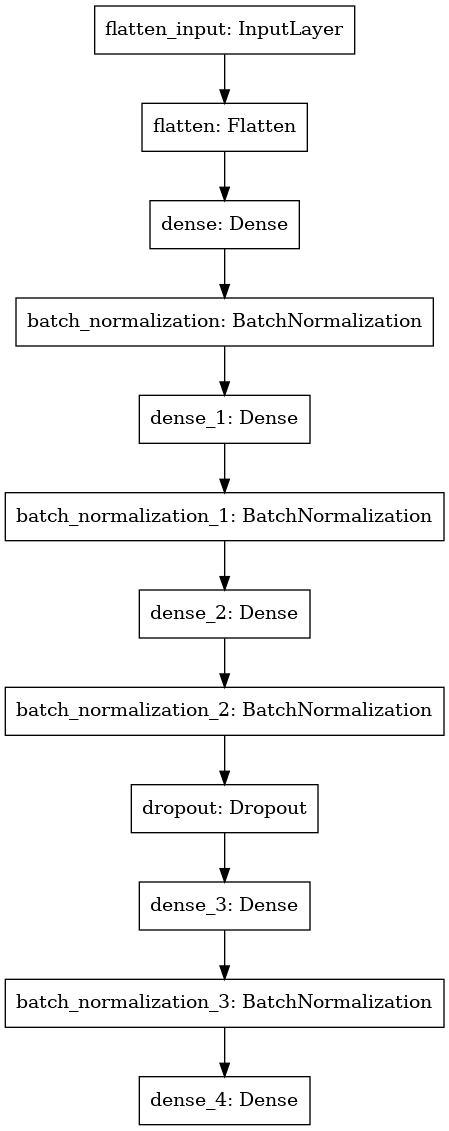

In [12]:
tensorflow.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None
)

In [13]:
model.get_weights()[0]  #weights

array([[-0.00541981, -0.01521752,  0.07721237, ...,  0.02180204,
        -0.04217989, -0.07210912],
       [-0.0782214 , -0.07905574,  0.04657123, ...,  0.00943537,
         0.05125789, -0.06326726],
       [ 0.03090369,  0.04196974, -0.03670669, ..., -0.01364543,
         0.00354718, -0.01121867],
       ...,
       [-0.01699703, -0.07311084,  0.04047802, ...,  0.02174472,
         0.02259558, -0.04938079],
       [ 0.07291997,  0.04858587, -0.03988139, ..., -0.02191511,
         0.06796429,  0.01313991],
       [-0.04158464,  0.05901653,  0.01222645, ...,  0.02475956,
        -0.02039759,  0.01708254]], dtype=float32)

In [14]:
model.get_weights()[1] #biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

We have taken `sparse_categorical_crossentropy` because it's faster as opposed to `categorical_crossentropy` since we don't need to OneHotEncode the data manually. We can use `sparse_categorical_crossentropy` when your classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and `categorical_crossentropy` when one sample can have multiple classes (e.g MNIST dataset) or labels are soft probabilities (like [0.5, 0.3, 0.2]).

We are also using the `Early Stopping` technique to ensure the data doesn't overfit and `Keras` stops the training when the model start to overfit the data. We use this technique by passing the `callbacks` argument

### Setting Optimizations for training

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. The learning rate is reduced after every mentioned number of `decay_steps`. We use `ExponentialDecay` while compiling the model to apply the concept of Learning Rate Scheduling

The idea is to get to the minima in a stable manner and not shoot out of the path haphazardly making the training unstable.

In [15]:
initial_learning_rate = 0.1

lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

### Training ANN

In [16]:
history = model.fit(X_train,y_train,batch_size = 500, epochs=100,validation_data = (X_test,y_test), shuffle=True,
                    validation_batch_size = 500, class_weight= class_weight, callbacks=[callback] )

2022-09-14 15:11:16.486771: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
120/120 [==============================] - 3s 8ms/step - loss: 0.0437 - accuracy: 0.8652 - val_loss: 0.5899 - val_accuracy: 0.9091
Epoch 2/100
120/120 [==============================] - 1s 4ms/step - loss: 0.0172 - accuracy: 0.9511 - val_loss: 0.2237 - val_accuracy: 0.9475
Epoch 3/100
120/120 [==============================] - 1s 4ms/step - loss: 0.0135 - accuracy: 0.9616 - val_loss: 0.1795 - val_accuracy: 0.9597
Epoch 4/100
120/120 [==============================] - 1s 4ms/step - loss: 0.0112 - accuracy: 0.9681 - val_loss: 0.1562 - val_accuracy: 0.9642
Epoch 5/100
120/120 [==============================] - 1s 4ms/step - loss: 0.0090 - accuracy: 0.9740 - val_loss: 0.1440 - val_accuracy: 0.9653
Epoch 6/100
120/120 [==============================] - 1s 4ms/step - loss: 0.0079 - accuracy: 0.9769 - val_loss: 0.1339 - val_accuracy: 0.9660
Epoch 7/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0070 - accuracy: 0.9793 - val_loss: 0.1737 - val_accuracy: 0.9622

### Plotting the ANN Loss Plot

In [17]:
#Training Loss Plot
fig = px.line(x = range(len(history.history['loss'])), y=np.around(history.history['loss'],4), template='simple_white',
              labels={'y':'Loss', 'x': 'Epochs'}, title = 'ANN Training Loss Plot', color_discrete_sequence=["steelblue"], 
              markers=True)

fig.update_layout(xaxis_title="Epochs",yaxis_title=" Loss")


#Validation Loss Plot
fig1 = px.line(x = range(len(history.history['val_loss'])), y=np.around(history.history['val_loss'],4), template='simple_white',
              labels={'y':'Validation Loss', 'x': 'Epochs'}, title = 'ANN Validation Loss Plot', 
               color_discrete_sequence=["orange"], markers=True)

fig1.update_layout(xaxis_title="Epochs",yaxis_title=" Validation Loss")

#Showing the figures
fig.show()
fig1.show()

In [18]:
fig = px.line(x = range(len(history.history['accuracy'])),
              y=history.history['accuracy'], 
              template='simple_white',
              labels = {'x': 'Epoch', 'y':'Accuracy'
                      },
              title = 'ANN Training Accuracy Plot', 
              color_discrete_sequence=["steelblue"],
              #text=[ '%.3f' % elem for elem in history.history['accuracy'] ],
              markers=True)
fig.update_layout(xaxis_title="Epochs",yaxis_title=" Accuracy")
fig.update_traces(textposition="top center")

#2nd Plot
fig1 = px.line(x= range(len(history.history['val_accuracy'])), y= history.history['val_accuracy'], 
               labels = {'x': 'Epoch', 'y':'Validation Accuracy'
                      },
               template='simple_white',title = 'ANN Validation Accuracy Plot',
               #text=[ '%.3f' % elem for elem in history.history['val_accuracy'] ],
               color_discrete_sequence=["orange"], markers=True)

fig1.update_layout(
    xaxis_title="Epochs",
    yaxis_title="Validation Accuracy")
fig1.update_traces(textposition="top center")

fig.show()
fig1.show()

### Classification Report

In [19]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.93      0.96       892
           6       0.98      0.98      0.98       958
           7       0.95      0.98      0.97      1028
           8       0.95      0.95      0.95       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### ANN Confusion Matrix

In [20]:
confusionmatrix = np.around(confusion_matrix(y_test, y_pred, normalize='true'),4)

fig = px.imshow(confusionmatrix, 
                text_auto=True, 
                color_continuous_scale=px.colors.sequential.Viridis, 
                aspect="auto", 
                labels=dict(x="Predicted Label", y="Correct Label"))

fig.update_xaxes(side="top")

fig.show()

In [21]:
#Getting the Image labels that is misqualified the most
count = {int(value): list(y_test[y_test != y_pred]).count(value) for value in set(y_test[y_test != y_pred])}
maxvalue = max(count, key=count.get)
#Setting the color of the most misqualified labels to 'indianred'
colors = {}
for i in range(len(np.unique(y_train))):
    for x in ['lightgray']:
        for j in ['indianred']:
            colors[i] = x
            colors[maxvalue] = j
print(colors)

{0: 'lightgray', 5: 'indianred', 1: 'lightgray', 2: 'lightgray', 3: 'lightgray', 4: 'lightgray', 6: 'lightgray', 7: 'lightgray', 8: 'lightgray', 9: 'lightgray'}


### ANN Misclassified Plot

In [22]:
fig = px.histogram(x=y_test[y_test != y_pred], 
                   template='simple_white', 
                   text_auto=True,
                   color = y_test[y_test != y_pred],
                   labels={'x':'Image Label'},
                   color_discrete_map = colors,
                  title='ANN Misclassified Labels Count')
fig.update_layout(
xaxis_title="Image Labels",yaxis_title=" Count")

fig.update_xaxes(ticktext=np.unique(y_train),tickvals=np.unique(y_train), ticklabelstep=1, 
                 type="category", categoryorder="total descending")
fig.show()

In [23]:
#Cases where misclassification has been done
print(len(y_test[y_test != y_pred]),'cases out of', len(X_test), 'cases are being misclassified which gives us an error rate of', np.around((len(y_test[y_test != y_pred])/len(X_test)*100),4))

292 cases out of 10000 cases are being misclassified which gives us an error rate of 2.92


## Convolution Neural Network (CNN)

Now that we are done training and improving the ANN. We will now use the CNN (Convolution Neural Network) for training and prediction purposes. 

### What are convolutions?
A convolution is a filter that passes over an image, processes it, and extracts the important features.

Let's say you have an image of a person wearing a sneaker. How would you detect that a sneaker is present in the image? In order for your program to "see" the image as a sneaker, you'll have to extract the important features, and blur the inessential features. This is called feature mapping.

The feature mapping process is theoretically simple. You'll scan every pixel in the image and then look at its neighboring pixels. You multiply the values of those pixels by the equivalent weights in a filter.

For example:

![](https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/f7b0ab29e09a51f.png)

In this case, a 3x3 convolution matrix, or image kernel, is specified.

The current pixel value is 192. You can calculate the value of the new pixel by looking at the neighbor values, multiplying them by the values specified in the filter, and making the new pixel value the final amount.

### Understanding Pooling
Similar to convolutions, pooling greatly helps with detecting features. Pooling layers reduce the overall amount of information in an image while maintaining the features that are detected as present.

![](https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/6029904d82700d8e.png)

There are a number of different types of pooling, but you'll use one called Maximum (Max) Pooling.

Iterate over the image and, at each point, consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of those (hence max pooling) and load it into the new image. Thus, the new image will be one-fourth the size of the old.




**Why CNNs are better than ANNs in case of Image Classification**
1. *ANNs are computationaly expensive because as you add more layers or neurons the weights and biases are going to increase which means there will be much more calculations of gradient descent happening.*
2. *Loss Of Information or features in a way that if we try to reduce the layers or neurons the ANN model may not be able to pick up the features of the image as correctly as possible. If we keep on adding layers or neuron, we are gonna be facing the challenge of overfitting which is something we definitely don't want.*


Let's now train the CNN on the same data. We have reshaped the data and then flattened it out before giving it to the output layer which basically will classify the digit.

In [24]:
print('X train shape -', X_train.shape)

X train shape - (60000, 28, 28)


In [25]:
print('X test shape -', X_test.shape)

X test shape - (10000, 28, 28)


In [26]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Our training and test data has been reshaped and is ready to be fed to the model. Let's first take a look if the reshaping has been done correctly or not.

In [27]:
print('Reshaped X train shape -', X_train[0].shape)

Reshaped X train shape - (28, 28, 1)


## CNN Model Architecture

In [28]:
model = Sequential()

#1st Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding = 'Same', input_shape=(28,28,1))),
model.add(MaxPool2D(pool_size=(2, 2), strides=2)),
model.add(BatchNormalization())

#2nd Layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='elu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#3rd Layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='elu'))
model.add(BatchNormalization())

#Output Layer
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)         

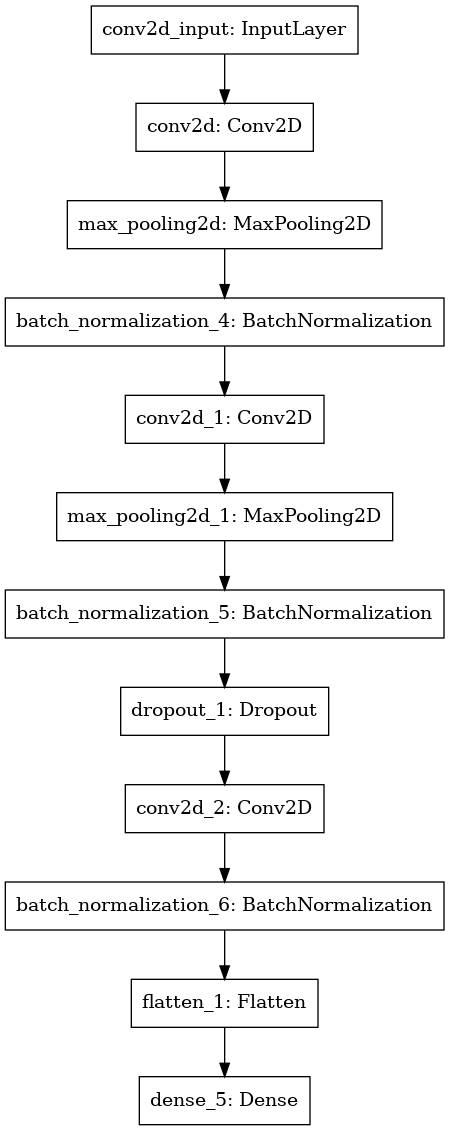

In [29]:
tensorflow.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None
)

In [30]:
initial_learning_rate = 0.1

lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

We are using the `class_weight` argument to help the imbalanced data. The argument was created before training the ANN and as per the results, its helping a lot make predictions better.

In [31]:
history = model.fit(X_train,y_train,batch_size=500, epochs=100,validation_data = (X_test,y_test),shuffle=True,
                    validation_batch_size=500, callbacks=[callback], class_weight=class_weight)

Epoch 1/100


2022-09-14 15:11:30.248437: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


120/120 [==============================] - 7s 12ms/step - loss: 0.3243 - accuracy: 0.7804 - val_loss: 0.3519 - val_accuracy: 0.8956
Epoch 2/100
120/120 [==============================] - 1s 11ms/step - loss: 0.0202 - accuracy: 0.9375 - val_loss: 0.2315 - val_accuracy: 0.9370
Epoch 3/100
120/120 [==============================] - 1s 11ms/step - loss: 0.0142 - accuracy: 0.9560 - val_loss: 0.1751 - val_accuracy: 0.9447
Epoch 4/100
120/120 [==============================] - 1s 11ms/step - loss: 0.0109 - accuracy: 0.9654 - val_loss: 0.1687 - val_accuracy: 0.9469
Epoch 5/100
120/120 [==============================] - 1s 11ms/step - loss: 0.0089 - accuracy: 0.9730 - val_loss: 0.0848 - val_accuracy: 0.9727
Epoch 6/100
120/120 [==============================] - 1s 11ms/step - loss: 0.0077 - accuracy: 0.9765 - val_loss: 0.0544 - val_accuracy: 0.9820
Epoch 7/100
120/120 [==============================] - 1s 11ms/step - loss: 0.0068 - accuracy: 0.9790 - val_loss: 0.0418 - val_accuracy: 0.9854
Epoc

In [32]:
fig = px.line(x = range(1,len(history.history['accuracy'])+1),
              y=np.around(history.history['loss'],4), 
              template='simple_white',
              title = 'CNN Training Loss Plot',
              labels = {'x': 'Epoch', 'y':'Loss'
                      },
              color_discrete_sequence=["steelblue"],
              markers=True)

fig.update_layout(xaxis_title="Epochs",yaxis_title=" Loss")

fig1 = px.line(x= range(1,len(history.history['accuracy'])+1),
               y=np.around(history.history['val_loss'],4), template='simple_white',
               title = 'CNN Validation Loss Plot', 
               labels = {'x': 'Epoch', 'y':'Validation Loss'},
               color_discrete_sequence=["orange"], markers=True)

fig1.update_layout(xaxis_title="Epochs",yaxis_title=" Validation Loss")

fig.show()

fig1.show()

In [33]:
fig = px.line(x = range(1,len(history.history['accuracy'])+1),
              y=np.around(history.history['accuracy'],4), 
              template='simple_white',
              title = 'CNN Training Accuracy Plot', 
              labels = {'x': 'Epoch', 'y':'Accuracy'},
              color_discrete_sequence=["steelblue"],
              #text=[ '%.3f' % elem for elem in history.history['accuracy'] ],
              markers=True)
fig.update_layout(xaxis_title="Epochs",yaxis_title=" Accuracy")
#fig.update_traces(textposition="top center")

#2nd Plot
fig1 = px.line(x= range(1, len(history.history['val_accuracy'])+1), 
               y= np.around(history.history['val_accuracy'],4), 
               template='simple_white',
               labels = {'x': 'Epoch', 'y':'Validation Accuracy'},
               title = 'CNN Validation Accuracy Plot', 
               color_discrete_sequence=["orange"], markers=True)

fig1.update_layout(xaxis_title="Epochs",yaxis_title="Validation Accuracy")
#fig1.update_traces(textposition="top center")

fig.show()
fig1.show()

### Classification report

In [34]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.96      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### CNN Misclassified Plot

In [35]:
#Getting the Image labels that is misqualified the most
count = {int(value): list(y_test[y_test != y_pred]).count(value) for value in set(y_test[y_test != y_pred])}
maxvalue = max(count, key=count.get)
#Setting the color of the most misqualified labels to 'indianred'
colors = {}
for i in range(len(np.unique(y_train))):
    for x in ['lightgray']:
        for j in ['indianred']:
            colors[i] = x
            colors[maxvalue] = j
print(colors)

{0: 'lightgray', 9: 'indianred', 1: 'lightgray', 2: 'lightgray', 3: 'lightgray', 4: 'lightgray', 5: 'lightgray', 6: 'lightgray', 7: 'lightgray', 8: 'lightgray'}


In [36]:
fig = px.histogram(x=y_test[y_test != y_pred], 
                   template='simple_white', 
                   text_auto=True,
                   color = y_test[y_test != y_pred],
                   labels={'x':'Image Label', 'color': 'Image Label'},
                   color_discrete_map = colors,
                  title='CNN Misclassified Labels Count')

fig.update_layout(xaxis_title="Image Labels",yaxis_title=" Count")

fig.update_xaxes(ticktext=np.unique(y_train), ticklabelstep=1, type="category", categoryorder="total descending")

fig.show()

### Confusion Matrix

In [37]:
confusionmatrix = np.around(confusion_matrix(y_test, y_pred, normalize='true'),4)
fig = px.imshow(confusionmatrix, text_auto=True, aspect="auto", 
                color_continuous_scale=px.colors.sequential.Teal,
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))

fig.update_xaxes(side="top")

fig.update_xaxes(ticktext=np.unique(y_test), tickvals = np.unique(y_test), ticklabelstep=1)

fig.show()

In [38]:
#Cases where misclassification has been done
print(len(y_test[y_test != y_pred]),'cases out of', len(X_test), 'cases are being misclassified which gives us an error rate of', np.around((len(y_test[y_test != y_pred])/len(X_test)*100),4))

138 cases out of 10000 cases are being misclassified which gives us an error rate of 1.38


## Summary

We can clearly see that CNN is performing better on Image data as compared to the ANNs and the CNN is only working with 44,000 weights and the ANN is working with a whopping 110,000 weights. Imagine the number when it translates to images with better resolution and there is more training data. 

Even when the ANN has more weights it still is making a higher error as compared to that of the CNN which outrightly states that CNN works better on Image Data. Two major benefits of CNN is that its computationally cheaper than ANN and the loss of spatial information is least to negligible.

I HOPE THIS NOTEBOOK HELPED YOU IN SOME WAY OR THE OTHER. THANKS FOR GOING THROUGH THE NOTEBOOK!!!

## Further Resources

1. https://colab.research.google.com/drive/1dJZZdhngq4eN83sQCupyh2QbyzrsBB-e?usp=sharing
2. https://developers.google.com/codelabs/tensorflow-3-convolutions#5
3. https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
4. https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
5. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler